In [1]:
from Portfolios import Portfolio, PortfolioValuator, PositionIdentifier, InstrumentValuator
from PositionIdentifier import Currency
from TimeSeries import TimeSeries
import numpy as npplt
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import date, datetime


my_portfolio:Portfolio = Portfolio("DEFAULT", datetime(2021,1,18))
my_portfolio.buy('MSCI', 2578, tags={'PERFORMANCE SHARES'}) #Performance shares
my_portfolio.buy('MSCI', 3916, tags={'RESTRICTED SHARES'}) #Restricted shares
my_portfolio.buy('MSCI', 1110, tags={'STOCK OPTIONS'}) #Stock options
my_portfolio.buy('MSCI', 807, tags={'BROADRIDGE SHARES'})  #Bradridge shares
my_portfolio.buy('MSCI', 3000, tags={'MORGAN STANLEY SHARES'})  #Bradridge shares
v:PortfolioValuator = PortfolioValuator(portfolio=my_portfolio)
# Get the valuation of each position in the portfolio
for position_identifier in my_portfolio.get_positions():
    position_valuator = InstrumentValuator.valuator(my_portfolio, position_identifier)
    val = position_valuator.get_valuation(date(2022,11,27), Currency("USD"))
    print("Position {ticker} of {shares} shares is valued at {valuation:.2f}".format(ticker=position_identifier.id.get_full_ticker(), shares=my_portfolio.get_position_amount(position_identifier), valuation=val))
# Value the MSCI stocks
msci_stocks = v.get_valuation(date.fromisoformat("2022-11-27"))
print("Value of the MSCI stocks: {msci_stocks:.2f} USD".format(msci_stocks=msci_stocks))

Position MSCI.US of 2578 shares is valued at 1320606.31
Position MSCI.US of 3916 shares is valued at 2006010.20
Position MSCI.US of 1110 shares is valued at 568608.61
Position MSCI.US of 807 shares is valued at 413393.83
Position MSCI.US of 3000 shares is valued at 1536780.03
Value of the MSCI stocks: 5845398.97 USD


In [2]:
#Add cash
my_portfolio.add('CHF', 14845)  # BCGE
my_portfolio.add('EUR', 2000)   # N26
my_portfolio.add('EUR', 1169)   # Boursorama
my_portfolio.add('CHF', 387798) # UBS
my_portfolio.add('CHF', 42233)  # Liechsteinstein
with_cash = PortfolioValuator(portfolio=my_portfolio).get_valuation(date.fromisoformat("2022-11-27"))
print(with_cash)

6319360.764816645


In [3]:
# Add crypto currencies
my_portfolio.add('ETH', 32.9123, tags={'CRYPTOS'})
my_portfolio.add('BTC', 2.2347, tags={'CRYPTOS'})
my_portfolio.add('DOT', 1214.4988, tags={'CRYPTOS'})
with_cryptos = PortfolioValuator(portfolio=my_portfolio).get_valuation(date.fromisoformat("2022-11-27"))
# Explicitly value the crypto positions
crypto_portfolio = my_portfolio.create(name="CRYPTOS", tags={'CRYPTOS'})
crypto_value=PortfolioValuator(portfolio=crypto_portfolio).get_valuation(date.fromisoformat("2022-11-27"))
print("Cryptos are valued at: {cryptos:.2f}".format(cryptos=crypto_value)) 
print("Portfolio valuation with cryptos: {with_cryptos:.2f}".format(with_cryptos=with_cryptos))

Cryptos are valued at: 82518.73
Portfolio valuation with cryptos: 6401879.49


In [4]:
# Add dept owners to me
my_portfolio.add('CHF', 50000) # DEBTORS
with_deptors = PortfolioValuator(portfolio=my_portfolio).get_valuation(date.fromisoformat("2022-11-27"))
print(with_deptors)

6454778.348888546


In [5]:
# Add swissquote account
my_portfolio.add('EUR', 1462.32, tags={'SWISSQUOTE'})
my_portfolio.add('USD', 165928.14, tags={'SWISSQUOTE'})
my_portfolio.buy('IPRP.SW', 235, tags={'SWISSQUOTE'})
my_portfolio.buy('VUSA.SW', 800, tags={'SWISSQUOTE'})
my_portfolio.buy('WSRUSA.SW', 489, tags={'SWISSQUOTE'})
my_portfolio.buy('EFA', 428, tags={'SWISSQUOTE'})
my_portfolio.buy('LCTU', 428, datetime(2021,4,8), tags={'SWISSQUOTE'})
my_portfolio.buy('BCHN.LSE', 460, tags={'SWISSQUOTE'})
my_portfolio.buy('STLA.PA', 2923, datetime(2021,1,18), tags={'SWISSQUOTE'})
my_portfolio.buy('C40.PA', 320, tags={'SWISSQUOTE'})
with_swissquote = PortfolioValuator(portfolio=my_portfolio).get_valuation(date.fromisoformat("2022-11-27"))
print(with_swissquote)

6901776.700196232


In [6]:
# Display the value of the swissquote portfolio independently
# First create a portfolio of the swissquote positions
swissquote = my_portfolio.create("My Swissquote Portfolio",tags={'SWISSQUOTE'})
portfolio_value = PortfolioValuator(portfolio=swissquote).get_valuation(date(2022,11,27))
print("Value of the swissquote portfolio:{value:.2f} USD".format(value=portfolio_value))
# Now get it  in CHF
portfolio_value = PortfolioValuator(portfolio=swissquote).get_valuation(date(2022,11,27), ccy='CHF')
print("Value of the swissquote portfolio:{value:.2f} CHF".format(value=portfolio_value))

Value of the swissquote portfolio:427824.38 USD
Value of the swissquote portfolio:404379.60 CHF


In [7]:
# Add life insurance contracts
my_portfolio.add('EUR', 162045, tags={'LIFE INSURANCE'})
my_portfolio.add('EUR', 75532, tags={'LIFE INSURANCE'})
my_portfolio.add('CHF', 28724, tags={'LIFE INSURANCE'})
my_portfolio.add('CHF', 8916, tags={'LIFE INSURANCE'})
with_insurance = PortfolioValuator(portfolio=my_portfolio).get_valuation(date(2022,11,27))
print(with_insurance)

7188483.507473848


In [8]:
# Add Paris investments
my_portfolio.buy('ACWI.PA', 76, tags={'FRANCE'})
total_portfolio_value_usd = PortfolioValuator(portfolio=my_portfolio).get_valuation(date(2022,11,27))
total_portfolio_value_eur = PortfolioValuator(portfolio=my_portfolio).get_valuation(date(2022,11,27),ccy="EUR")
total_portfolio_value_chf = PortfolioValuator(portfolio=my_portfolio).get_valuation(date(2022,11,27),ccy="CHF")
print("Total portfolio value in USD: {usd:.2f}".format(usd=total_portfolio_value_usd))
print("Total portfolio value in EUR: {eur:.2f}".format(eur=total_portfolio_value_eur))
print("Total portfolio value in CHF: {chf:.2f}".format(chf=total_portfolio_value_chf))
#Check if currency conversion is done right


Total portfolio value in USD: 7216180.82
Total portfolio value in EUR: 6944130.80
Total portfolio value in CHF: 6820734.11


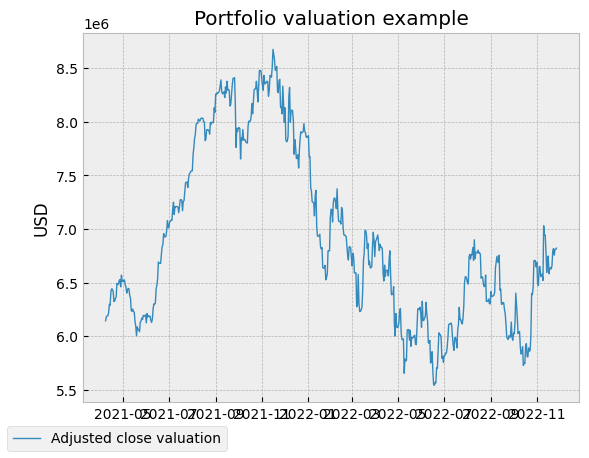

In [10]:
#Value my portfolio from 2021 to 2022
from graphs import graph_time_series
historical_value = PortfolioValuator(portfolio=my_portfolio).get_valuations(date(2021,4,8), ccy="CHF")
graph_time_series(historical_value)